# Experiment 1 - Notas do Enem 2021

In [3]:
import pandas as pd

datapaths = {   "2015": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2015.csv",
                "2016": "./datasets/extracted/DADOS/microdados_enem_2016.csv",
                "2017": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2017.csv",
                "2018": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2018.csv",
                "2019": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2019.csv",
                "2020": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2020.csv",
                "2021": "./datasets/extracted/DADOS/MICRODADOS_ENEM_2021.csv"}

# Load the 2021 dataset
microdados_2021 = pd.read_csv(datapaths["2021"], encoding="ISO-8859-1", delimiter=";")

# Select columns we are interested in analysing
columns_of_interest = [
    "NU_INSCRICAO", # Numero de Inscricao
    "TP_PRESENCA_CN", # "Presença na prova objetiva de Ciências da Natureza"
    "TP_PRESENCA_CH", # "Presença na prova objetiva de Ciências Humanas"
    "TP_PRESENCA_LC", # "Presença na prova objetiva de Linguagens e Códigos"
    "TP_PRESENCA_MT", # "Presença na prova objetiva de Matemática"
    "CO_PROVA_CN", # "Código do tipo de prova de Ciências da Natureza"
    "CO_PROVA_CH", # "Código do tipo de prova de Ciências Humanas"
    "CO_PROVA_LC", # "Código do tipo de prova de Linguagens e Códigos"
    "CO_PROVA_MT", # "Código do tipo de prova de Matemática"
    "NU_NOTA_CN", # "Nota da prova de Ciências da Natureza"
    "NU_NOTA_CH", # "Nota da prova de Ciências Humanas"
    "NU_NOTA_LC", # "Nota da prova de Linguagens e Códigos"
    "NU_NOTA_MT", # "Nota da prova de Matemática"
    "TP_STATUS_REDACAO", # "Situação da redação do participante"
    "NU_NOTA_REDACAO" # "Nota da prova de redação"
]

data = microdados_2021[columns_of_interest]

data.head()

,NU_INSCRICAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO
0,210053865474,0,1,1,0,NaN,881.0,892.0,NaN,NaN,574.6,472.6,NaN,1.0,760.0
1,210052384164,1,1,1,1,912.0,882.0,891.0,901.0,505.9,551.8,498.3,461.5,1.0,560.0
2,210052589243,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,210052128335,1,1,1,1,911.0,880.0,890.0,902.0,580.7,678.9,638.9,659.5,1.0,780.0
4,210051353021,1,1,1,1,912.0,882.0,891.0,901.0,497.7,532.4,457.6,582.6,1.0,780.0


## Data Process

In [5]:
# Let's remove everyone who didn't do each test

data = data.drop(data[data.TP_PRESENCA_CN != 1].index)
data = data.drop(data[data.TP_PRESENCA_CH != 1].index)
data = data.drop(data[data.TP_PRESENCA_LC != 1].index)
data = data.drop(data[data.TP_PRESENCA_MT != 1].index)
data = data.drop(data[data.TP_STATUS_REDACAO != 1].index)

In [5]:
# Gather notes based on exam color

prova_cn_azul = data.drop(data[data.CO_PROVA_CN != 909].index).NU_NOTA_CN
prova_cn_amarela = data.drop(data[data.CO_PROVA_CN != 910].index).NU_NOTA_CN
prova_cn_cinza = data.drop(data[data.CO_PROVA_CN != 911].index).NU_NOTA_CN
prova_cn_rosa = data.drop(data[data.CO_PROVA_CN != 912].index).NU_NOTA_CN

prova_ch_azul = data.drop(data[data.CO_PROVA_CH != 879].index).NU_NOTA_CH
prova_ch_amarela = data.drop(data[data.CO_PROVA_CH != 880].index).NU_NOTA_CH
prova_ch_branca = data.drop(data[data.CO_PROVA_CH != 881].index).NU_NOTA_CH
prova_ch_rosa = data.drop(data[data.CO_PROVA_CH != 882].index).NU_NOTA_CH

prova_lc_azul = data.drop(data[data.CO_PROVA_LC != 889].index).NU_NOTA_LC
prova_lc_amarela = data.drop(data[data.CO_PROVA_LC != 890].index).NU_NOTA_LC
prova_lc_rosa = data.drop(data[data.CO_PROVA_LC != 891].index).NU_NOTA_LC
prova_lc_branca = data.drop(data[data.CO_PROVA_LC != 892].index).NU_NOTA_LC

prova_mt_azul = data.drop(data[data.CO_PROVA_MT != 899].index).NU_NOTA_MT
prova_mt_amarela = data.drop(data[data.CO_PROVA_MT != 900].index).NU_NOTA_MT
prova_mt_rosa = data.drop(data[data.CO_PROVA_MT != 901].index).NU_NOTA_MT
prova_mt_cinza = data.drop(data[data.CO_PROVA_MT != 902].index).NU_NOTA_MT

assert(len(prova_cn_azul) != 0)
assert(len(prova_cn_amarela) != 0)
assert(len(prova_cn_cinza) != 0)
assert(len(prova_cn_rosa) != 0)
assert(len(prova_ch_azul) != 0)
assert(len(prova_ch_amarela) != 0)
assert(len(prova_ch_branca) != 0)
assert(len(prova_ch_rosa) != 0)
assert(len(prova_lc_azul) != 0)
assert(len(prova_lc_amarela) != 0)
assert(len(prova_lc_rosa) != 0)
assert(len(prova_lc_branca) != 0)
assert(len(prova_mt_azul) != 0)
assert(len(prova_mt_amarela) != 0)
assert(len(prova_mt_rosa) != 0)
assert(len(prova_mt_cinza) != 0)

prova_cn = pd.concat(
    [prova_cn_azul.rename("Azul").reset_index(drop=True),
     prova_cn_amarela.rename("Amarela").reset_index(drop=True),
     prova_cn_cinza.rename("Cinza").reset_index(drop=True),
     prova_cn_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_cn["Azul"].dropna()) == len(prova_cn_azul))
assert(len(prova_cn["Amarela"].dropna()) == len(prova_cn_amarela))
assert(len(prova_cn["Cinza"].dropna()) == len(prova_cn_cinza))
assert(len(prova_cn["Rosa"].dropna()) == len(prova_cn_rosa))

prova_ch = pd.concat(
    [prova_ch_azul.rename("Azul").reset_index(drop=True),
     prova_ch_amarela.rename("Amarela").reset_index(drop=True),
     prova_ch_branca.rename("Branca").reset_index(drop=True),
     prova_ch_rosa.rename("Rosa").reset_index(drop=True)], axis = 1)

assert(len(prova_ch["Azul"].dropna()) == len(prova_ch_azul))
assert(len(prova_ch["Amarela"].dropna()) == len(prova_ch_amarela))
assert(len(prova_ch["Branca"].dropna()) == len(prova_ch_branca))
assert(len(prova_ch["Rosa"].dropna()) == len(prova_ch_rosa))

prova_lc = pd.concat(
    [prova_lc_azul.rename("Azul").reset_index(drop=True),
     prova_lc_amarela.rename("Amarela").reset_index(drop=True),
     prova_lc_rosa.rename("Rosa").reset_index(drop=True),
     prova_lc_branca.rename("Branca").reset_index(drop=True)], axis = 1)

assert(len(prova_lc["Azul"].dropna()) == len(prova_lc_azul))
assert(len(prova_lc["Amarela"].dropna()) == len(prova_lc_amarela))
assert(len(prova_lc["Rosa"].dropna()) == len(prova_lc_rosa))
assert(len(prova_lc["Branca"].dropna()) == len(prova_lc_branca))
data = data.drop(data[data.TP_PRESENCA_CN != data.TP_PRESENCA_CH].index)
prova_mt = pd.concat(
    [prova_mt_azul.rename("Azul").reset_index(drop=True),
     prova_mt_amarela.rename("Amarela").reset_index(drop=True),
     prova_mt_rosa.rename("Rosa").reset_index(drop=True),
     prova_mt_cinza.rename("Cinza").reset_index(drop=True)], axis = 1)

assert(len(prova_mt["Azul"].dropna()) == len(prova_mt_azul))
assert(len(prova_mt["Amarela"].dropna()) == len(prova_mt_amarela))
assert(len(prova_mt["Rosa"].dropna()) == len(prova_mt_rosa))
assert(len(prova_mt["Cinza"].dropna()) == len(prova_mt_cinza))
assert(len(prova_cn_amarela)+len(prova_cn_azul)+len(prova_cn_cinza)+len(prova_cn_rosa) == len(prova_mt_amarela)+len(prova_mt_azul)+len(prova_mt_cinza)+len(prova_mt_rosa))
assert(len(prova_ch_amarela)+len(prova_ch_azul)+len(prova_ch_branca)+len(prova_ch_rosa) == len(prova_lc_amarela)+len(prova_lc_azul)+len(prova_lc_branca)+len(prova_lc_rosa))

## Results

In [96]:
# mean for each exam
means = pd.concat([prova_lc.mean().rename("Languages"), prova_ch.mean().rename("Human Sci."), prova_cn.mean().rename("Natural Sci."), prova_mt.mean().rename("Mathematics")], axis=1)
means.loc['Branca'] = means.loc['Branca'].fillna(means.loc['Cinza'])
means = means.drop("Cinza")
print("Means")
print(means.round(2))

# std for each exam
stds = pd.concat([prova_lc.std().rename("Languages"), prova_ch.std().rename("Human Sci."), prova_cn.std().rename("Natural Sci."), prova_mt.std().rename("Mathematics")], axis=1)
stds.loc['Branca'] = stds.loc['Branca'].fillna(stds.loc['Cinza'])
stds = stds.drop("Cinza")
print("\nStd")
print(stds.round(2))

Means
         Languages  Human Sci.  Natural Sci.  Mathematics
Azul        507.10      524.52        491.06       536.55
Amarela     504.33      522.69        492.51       534.04
Rosa        505.59      522.48        493.48       540.99
Branca      503.77      525.17        492.03       536.04

Std
         Languages  Human Sci.  Natural Sci.  Mathematics
Azul         78.14       93.69         81.57       109.14
Amarela      78.00       94.85         80.18       111.56
Rosa         77.82       94.73         80.86       110.87
Branca       79.24       94.54         80.96       110.76


In [97]:
import scipy.stats as st
import numpy as np

# Calculate confidence intervals
ci_lc = {"Azul":None, "Amarela":None, "Rosa":None, "Branca":None}
for color in ci_lc:
    mu = prova_lc[color].mean()
    s = prova_lc[color].std() / np.sqrt(len(prova_lc[color]))
    dof = len(prova_lc[color])-1
    confidence = 0.99  
    ci_lc[color] = st.t.interval(confidence, df=dof, loc=mu, scale=s)
ci_lc = pd.DataFrame(ci_lc)
print("ci_lc\n", ci_lc)

ci_ch = {"Azul":None, "Amarela":None, "Rosa":None, "Branca":None}
for color in ci_ch:
    mu = prova_ch[color].mean()
    s = prova_ch[color].std() / np.sqrt(len(prova_ch[color]))
    dof = len(prova_ch[color])-1
    confidence = 0.99  
    ci_ch[color] = st.t.interval(confidence, df=dof, loc=mu, scale=s)
ci_ch = pd.DataFrame(ci_ch)
print("ci_ch\n", ci_ch)

ci_cn = {"Azul":None, "Amarela":None, "Rosa":None, "Cinza":None}
for color in ci_cn:
    mu = prova_cn[color].mean()
    s = prova_cn[color].std() / np.sqrt(len(prova_cn[color]))
    dof = len(prova_cn[color])-1
    confidence = 0.99  
    ci_cn[color] = st.t.interval(confidence, df=dof, loc=mu, scale=s)
ci_cn = pd.DataFrame(ci_cn)
print("ci_cn\n", ci_cn)

ci_mt = {"Azul":None, "Amarela":None, "Rosa":None, "Cinza":None}
for color in ci_mt:
    mu = prova_mt[color].mean()
    s = prova_mt[color].std() / np.sqrt(len(prova_mt[color]))
    dof = len(prova_mt[color])-1
    confidence = 0.99
    ci_mt[color] = st.t.interval(confidence, df=dof, loc=mu, scale=s)
ci_mt = pd.DataFrame(ci_mt)
print("ci_mt\n", ci_mt)


ci_lc
          Azul     Amarela        Rosa      Branca
0  506.824119  504.054055  505.315011  503.491572
1  507.372238  504.601174  505.860911  504.047371
ci_ch
          Azul     Amarela        Rosa      Branca
0  524.187047  522.355613  522.143990  524.843026
1  524.844226  523.020923  522.808491  525.506177
ci_cn
          Azul     Amarela        Rosa       Cinza
0  490.774450  492.223882  493.196138  491.742426
1  491.346985  492.786638  493.763671  492.310683
ci_mt
          Azul     Amarela        Rosa       Cinza
0  536.164287  533.643987  540.597030  535.651268
1  536.930313  534.427054  541.375254  536.428672


In [110]:
import matplotlib.pyplot as plt
import numpy as np

err_lc = ci_lc.iloc[1] - ci_lc.iloc[0]
err_ch = ci_ch.iloc[1] - ci_ch.iloc[0]
err_cn = ci_cn.iloc[1] - ci_cn.iloc[0]
err_mt = ci_mt.iloc[1] - ci_mt.iloc[0]


# create data for the plot
x = ["Azul", "Amarela", "Branca", "Rosa"]  # the x locations for the bars
print(means)
for column in x:
    mu_lc = np.array(means.loc[column])
    err_lc = np.array(err_lc[column])

    print(mu_lc, err_lc)

# create the error bar plot
fig, ax = plt.subplots()
ax.errorbar(x, means, yerr=stds, fmt='o', color='black', ecolor='red', capsize=10)

# set the x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(['Bar 1', 'Bar 2', 'Bar 3', 'Bar 4'])

# set the y-axis label
ax.set_ylabel('Value')

# set the plot title
ax.set_title('Error Bar Plot')

# show the plot
plt.show()


KeyError: 'Languages'

## Plots

Text(0.04, 0.5, 'Amount of Students')

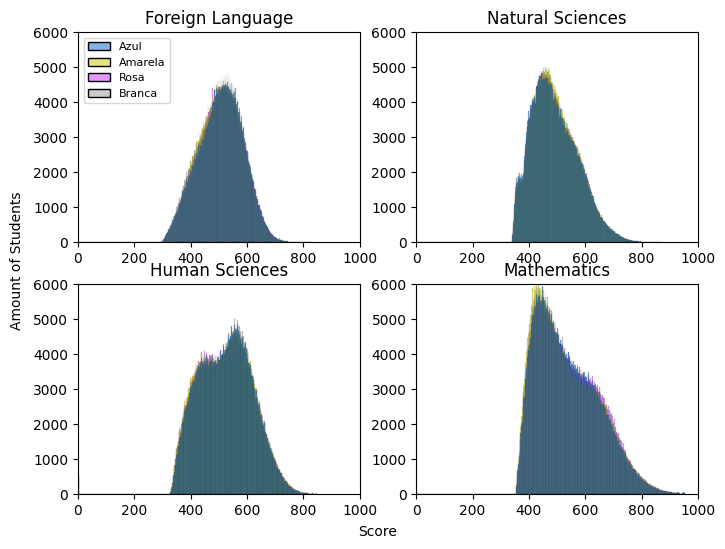

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(8, 6))

axes[0, 0].title.set_text("Foreign Language")
axes[1, 0].title.set_text("Human Sciences")
axes[0, 1].title.set_text("Natural Sciences")
axes[1, 1].title.set_text("Mathematics")

sns.histplot(prova_lc, ax=axes[0, 0], palette=["#0066cc", "#cccc00", "#cc33ff", "#999999"], legend=True)
sns.histplot(prova_ch, ax=axes[1, 0], palette=["#0066cc", "#cccc00", "#999999", "#cc33ff"], legend=False)
sns.histplot(prova_cn, ax=axes[0, 1], palette=["#0066cc", "#cccc00", "#999999", "#cc33ff"], legend=False)
sns.histplot(prova_mt, ax=axes[1, 1], palette=["#0066cc", "#cccc00", "#cc33ff", "#999999"], legend=False)

axes[0, 0].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[1, 0].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[0, 1].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])
axes[1, 1].set(xlabel=None, ylabel=None, ylim=(0,6000), xlim=(0,1000))#, yticks=[])

# Legend
sns.move_legend(axes[0, 0], "upper left", fontsize='8')
fig.text(0.5, 0.04, 'Score', ha='center')
fig.text(0.04, 0.5, 'Amount of Students', va='center', rotation='vertical')


In [29]:
prova_mt.index

RangeIndex(start=0, stop=523253, step=1)

In [10]:
# Calculate mean
mean_ch = prova_ch.mean()
mean_cn = prova_cn.mean()
mean_lc = prova_lc.mean()
mean_mt = prova_mt.mean()

print(mean_ch, mean_cn, mean_lc, mean_mt)

# Calculate std
mean_ch = prova_ch.std()
mean_cn = prova_cn.std()
mean_lc = prova_lc.std()
mean_mt = prova_mt.std()

print(mean_ch, mean_cn, mean_lc, mean_mt)

Azul       526.648255
Amarela    524.823964
Branca     527.250349
Rosa       524.480499
dtype: float64 Azul       492.551845
Amarela    494.044864
Cinza      493.516694
Rosa       494.947834
dtype: float64 Azul       509.087841
Amarela    506.308343
Rosa       507.433576
Branca     505.638654
dtype: float64 Azul       538.470490
Amarela    536.079355
Rosa       542.957626
Cinza      538.011692
dtype: float64
Azul       92.947033
Amarela    94.194322
Branca     93.827867
Rosa       94.153610
dtype: float64 Azul       81.526412
Amarela    80.133975
Cinza      80.935861
Rosa       80.781308
dtype: float64 Azul       77.152112
Amarela    77.076272
Rosa       76.990209
Branca     78.419205
dtype: float64 Azul       109.258377
Amarela    111.762631
Rosa       110.920447
Cinza      110.907773
dtype: float64


In [11]:
print("MT")
for column in prova_mt:
    print(column, len(prova_mt[column].dropna()))

print("CN")
for column in prova_cn:
    print(column, len(prova_cn[column].dropna()))

print("CH")
for column in prova_ch:
    print(column, len(prova_ch[column].dropna()))

print("LC")
for column in prova_lc:
    print(column, len(prova_lc[column].dropna()))

MT
Azul 517658
Amarela 523253
Rosa 518543
Cinza 518395
CN
Azul 517658
Amarela 523253
Cinza 518395
Rosa 518543
CH
Azul 517132
Amarela 524356
Branca 517563
Rosa 518465
LC
Azul 517132
Amarela 524356
Rosa 518465
Branca 517563


In [12]:
prova_ch

,Azul,Amarela,Branca,Rosa
0,476.5,678.9,539.2,551.8
1,502.7,402.2,617.9,532.4
2,524.3,419.9,602.0,493.2
3,578.9,587.0,602.7,437.7
4,488.5,619.5,541.5,346.9
...,...,...,...,...
524351,NaN,510.3,NaN,NaN
524352,NaN,476.8,NaN,NaN
524353,NaN,502.3,NaN,NaN
524354,NaN,380.2,NaN,NaN


In [13]:
prova_ch_azul_p = prova_ch.groupby("Azul").size().reset_index(name='P')
prova_ch_amarela_p = prova_ch.groupby("Amarela").size().reset_index(name='P')
prova_ch_branca_p = prova_ch.groupby("Branca").size().reset_index(name='P')
prova_ch_rosa_p = prova_ch.groupby("Rosa").size().reset_index(name='P')

prova_cn_azul_p = prova_cn.groupby("Azul").size().reset_index(name='P')
prova_cn_amarela_p = prova_cn.groupby("Amarela").size().reset_index(name='P')
prova_cn_cinza_p = prova_cn.groupby("Cinza").size().reset_index(name='P')
prova_cn_rosa_p = prova_cn.groupby("Rosa").size().reset_index(name='P')

prova_lc_azul_p = prova_lc.groupby("Azul").size().reset_index(name='P')
prova_lc_amarela_p = prova_lc.groupby("Amarela").size().reset_index(name='P')
prova_lc_branca_p = prova_lc.groupby("Branca").size().reset_index(name='P')
prova_lc_rosa_p = prova_lc.groupby("Rosa").size().reset_index(name='P')

prova_mt_azul_p = prova_mt.groupby("Azul").size().reset_index(name='P')
prova_mt_amarela_p = prova_mt.groupby("Amarela").size().reset_index(name='P')
prova_mt_cinza_p = prova_mt.groupby("Cinza").size().reset_index(name='P')
prova_mt_rosa_p = prova_mt.groupby("Rosa").size().reset_index(name='P')

In [14]:
prova_ch_p = pd.merge(prova_ch_azul_p, prova_ch_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_ch_p = pd.merge(prova_ch_p, prova_ch_branca_p, how="inner", left_on="Azul", right_on="Branca", suffixes=["", "Branca"])
prova_ch_p = pd.merge(prova_ch_p, prova_ch_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Branca", "Rosa"])

prova_cn_p = pd.merge(prova_cn_azul_p, prova_cn_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_cn_p = pd.merge(prova_cn_p, prova_cn_cinza_p, how="inner", left_on="Azul", right_on="Cinza", suffixes=["", "Cinza"])
prova_cn_p = pd.merge(prova_cn_p, prova_cn_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Cinza", "Rosa"])

prova_lc_p = pd.merge(prova_lc_azul_p, prova_lc_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_lc_p = pd.merge(prova_lc_p, prova_lc_branca_p, how="inner", left_on="Azul", right_on="Branca", suffixes=["", "Branca"])
prova_lc_p = pd.merge(prova_lc_p, prova_lc_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Branca", "Rosa"])

prova_mt_p = pd.merge(prova_mt_azul_p, prova_mt_amarela_p, how="inner", left_on="Azul", right_on="Amarela", suffixes=["Azul", "Amarela"])
prova_mt_p = pd.merge(prova_mt_p, prova_mt_cinza_p, how="inner", left_on="Azul", right_on="Cinza", suffixes=["", "Cinza"])
prova_mt_p = pd.merge(prova_mt_p, prova_mt_rosa_p, how="inner", left_on="Azul", right_on="Rosa", suffixes=["Cinza", "Rosa"])

# Remove redundant columns
prova_ch_p = prova_ch_p.drop(["Amarela", "Branca", "Rosa"], axis=1)
prova_ch_p = prova_ch_p.rename(columns={"Azul": "Score"})
prova_cn_p = prova_cn_p.drop(["Amarela", "Cinza", "Rosa"], axis=1)
prova_cn_p = prova_cn_p.rename(columns={"Azul": "Score"})
prova_lc_p = prova_lc_p.drop(["Amarela", "Branca", "Rosa"], axis=1)
prova_lc_p = prova_lc_p.rename(columns={"Azul": "Score"})
prova_mt_p = prova_mt_p.drop(["Amarela", "Cinza", "Rosa"], axis=1)
prova_mt_p = prova_mt_p.rename(columns={"Azul": "Score"})

In [15]:
for column in prova_ch_p:
    if column.startswith("P"):
        prova_ch_p[column] = prova_ch_p[column] / prova_ch_p[column].sum()

for column in prova_cn_p:
    if column.startswith("P"):
        prova_cn_p[column] = prova_cn_p[column] / prova_cn_p[column].sum()

for column in prova_lc_p:
    if column.startswith("P"):
        prova_lc_p[column] = prova_lc_p[column] / prova_lc_p[column].sum()

for column in prova_mt_p:
    if column.startswith("P"):
        prova_mt_p[column] = prova_mt_p[column] / prova_mt_p[column].sum()

In [22]:
prova_mt_p

,Score,PAzul,PAmarela,PCinza,PRosa
0,0.0,0.000112,0.000098,0.000156,0.000122
1,353.8,0.000066,0.000090,0.000066,0.000066
2,354.0,0.000006,0.000008,0.000006,0.000006
3,354.2,0.000010,0.000015,0.000017,0.000017
4,354.4,0.000014,0.000031,0.000010,0.000014
...,...,...,...,...,...
5459,935.5,0.000002,0.000004,0.000002,0.000004
5460,944.1,0.000035,0.000042,0.000058,0.000042
5461,948.5,0.000043,0.000038,0.000054,0.000033
5462,948.8,0.000031,0.000036,0.000039,0.000029


In [18]:
import numpy as np

def KLDivergence(x:pd.DataFrame, y:pd.DataFrame):
    px = np.array(x)
    py = np.array(y)
    return np.sum(np.where(px != 0, px * np.log2(px / py), 0))

print(KLDivergence(prova_ch_p["PAzul"], prova_ch_p["PAmarela"]))
print(KLDivergence(prova_ch_p["PAmarela"], prova_ch_p["PAzul"]))

0.012925470194004767
0.013224759732391924
